In [1]:
import os

import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens
%matplotlib inline

In [2]:
df = pd.read_csv('temporalgraph.n10k.csv',
                 sep=',',
                 header=None,
                 names=['year', 'node1_id', 'node2_id', 'freq']
                )

In [3]:
# read into a dictionary of graphs
G_dict = defaultdict(nx.Graph)
for yr in range(2010, 2000, -1):
    df_yr = df[df['year'] == yr]
    for _, row in df_yr.iterrows():
        G_dict[yr].add_edge(row['node1_id'], row['node2_id'], weight=row['freq'])

# count direct edges
edge_by_diff = defaultdict(Counter)
for yr in range(2010, 2007, -1):
    for edge in G_dict[yr].edges:
        # for yr_prev in range(yr-1, 2000, -1):
        for diff in range(1, 8):
            # diff = yr - yr_prev
            yr_prev = yr - diff
            if edge in G_dict[yr_prev].edges:  # found a direct edge
                # edge_by_diff[yr][diff] += G_dict[yr].edges[edge]['weight']  # muiltiple edges between two nodes
                edge_by_diff[yr][diff] += 1
                break

# make percentage labels
sum_edges = 0
percent_dict = dict()
for diff in range(1, 8):
    percent_dict[diff] = edge_by_diff[2010][diff] + edge_by_diff[2009][diff] + edge_by_diff[2008][diff]
    sum_edges += percent_dict[diff]
for diff in range(1, 8):
    percent_dict[diff] = percent_dict[diff] / sum_edges * 100
labels = ['{0:.2f}%'.format(percent_dict[i]) for i in range(1, 8)]

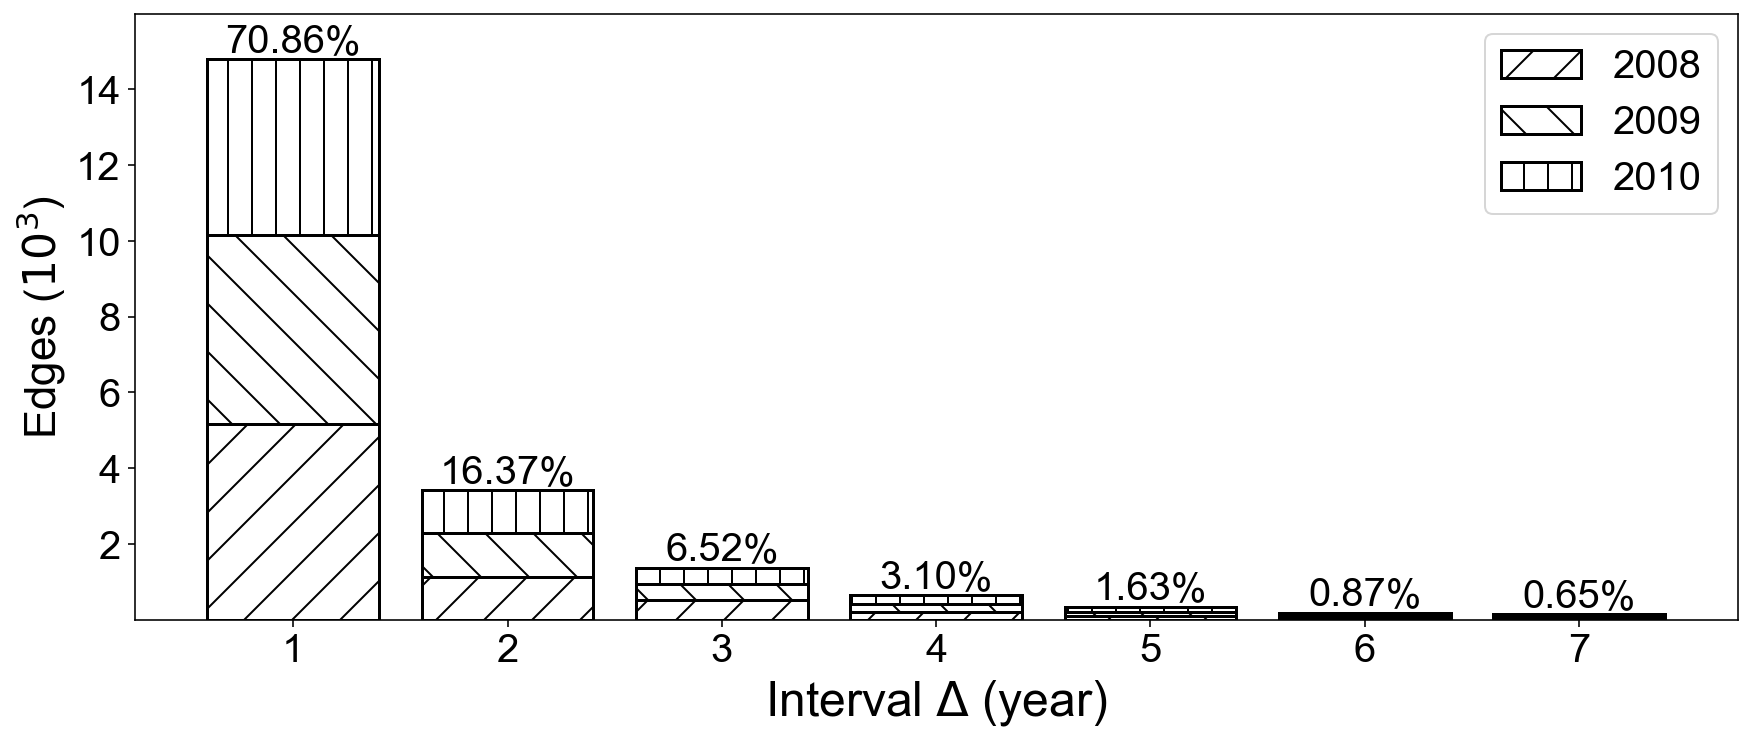

In [4]:
_hp = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(1, 8)
y_2010 = np.array([pair[1] for pair in sorted(edge_by_diff[2010].items(), key=lambda pair: pair[0])])
y_2009 = np.array([pair[1] for pair in sorted(edge_by_diff[2009].items(), key=lambda pair: pair[0])])
y_2008 = np.array([pair[1] for pair in sorted(edge_by_diff[2008].items(), key=lambda pair: pair[0])])

bar1 = ax.bar(x, y_2008, 
              color='w', edgecolor='black', hatch=_hp[0], linewidth=1.5,
              label='2008')
bar2 = ax.bar(x, y_2009, bottom=y_2008, 
              color='w', edgecolor='black', hatch=_hp[1], linewidth=1.5,
              label='2009')
bar3 = ax.bar(x, y_2010, bottom=y_2008 + y_2009, 
              color='w', edgecolor='black', hatch=_hp[2], linewidth=1.5,
              label='2010')

rects1 = bar1.patches
rects2 = bar2.patches
rects3 = bar3.patches

for rect1, rect2, rect3, label in zip(rects1, rects2, rects3, labels):
    height = rect1.get_height() + rect2.get_height() + rect3.get_height()
    ax.text(rect1.get_x() + rect1.get_width() / 2, height + 5, label,
        ha='center', va='bottom', fontsize=20)

# y axis
ax.set_ylim(0, 16000)
ax.yaxis.set_ticks([2000, 4000, 6000, 8000, 10000, 12000, 14000])
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14])
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)

ax.set_xlabel(r'Interval $\Delta$ (year)', fontsize=24)
ax.set_ylabel(r'Edges ($10^{3}$)', fontsize=22)
ax.legend(fontsize=20)

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
fig.savefig(os.path.join('.', 'motivation-1.pdf'), bbox_inches='tight', dpi=200)

In [5]:
# count common neighbors
nbr_by_diff = defaultdict(Counter)
for yr in range(2010, 2007, -1):
    for edge in G_dict[yr].edges:
        u, v = edge
        for diff in range(1, 8):
            yr_prev = yr - diff
            if edge in G_dict[yr_prev].edges:  # found a direct edge
                break
            if u in G_dict[yr_prev] and v in G_dict[yr_prev] and len(list(nx.common_neighbors(G_dict[yr_prev], u, v))) > 0:  # found a common neighbor
                # nbr_by_diff[yr][diff] += len(list(nx.common_neighbors(G_dict[yr_prev], u, v)))
                # nbr_by_diff[yr][diff] += G_dict[yr].edges[edge]['weight']
                nbr_by_diff[yr][diff] += 1
                break

# make percentage labels
sum_edges = 0
percent_dict = dict()
for diff in range(1, 8):
    percent_dict[diff] = nbr_by_diff[2010][diff] + nbr_by_diff[2009][diff] + nbr_by_diff[2008][diff]
    sum_edges += percent_dict[diff]
for diff in range(1, 8):
    percent_dict[diff] = percent_dict[diff] / sum_edges * 100
labels = ['{0:.2f}%'.format(percent_dict[i]) for i in range(1, 8)]

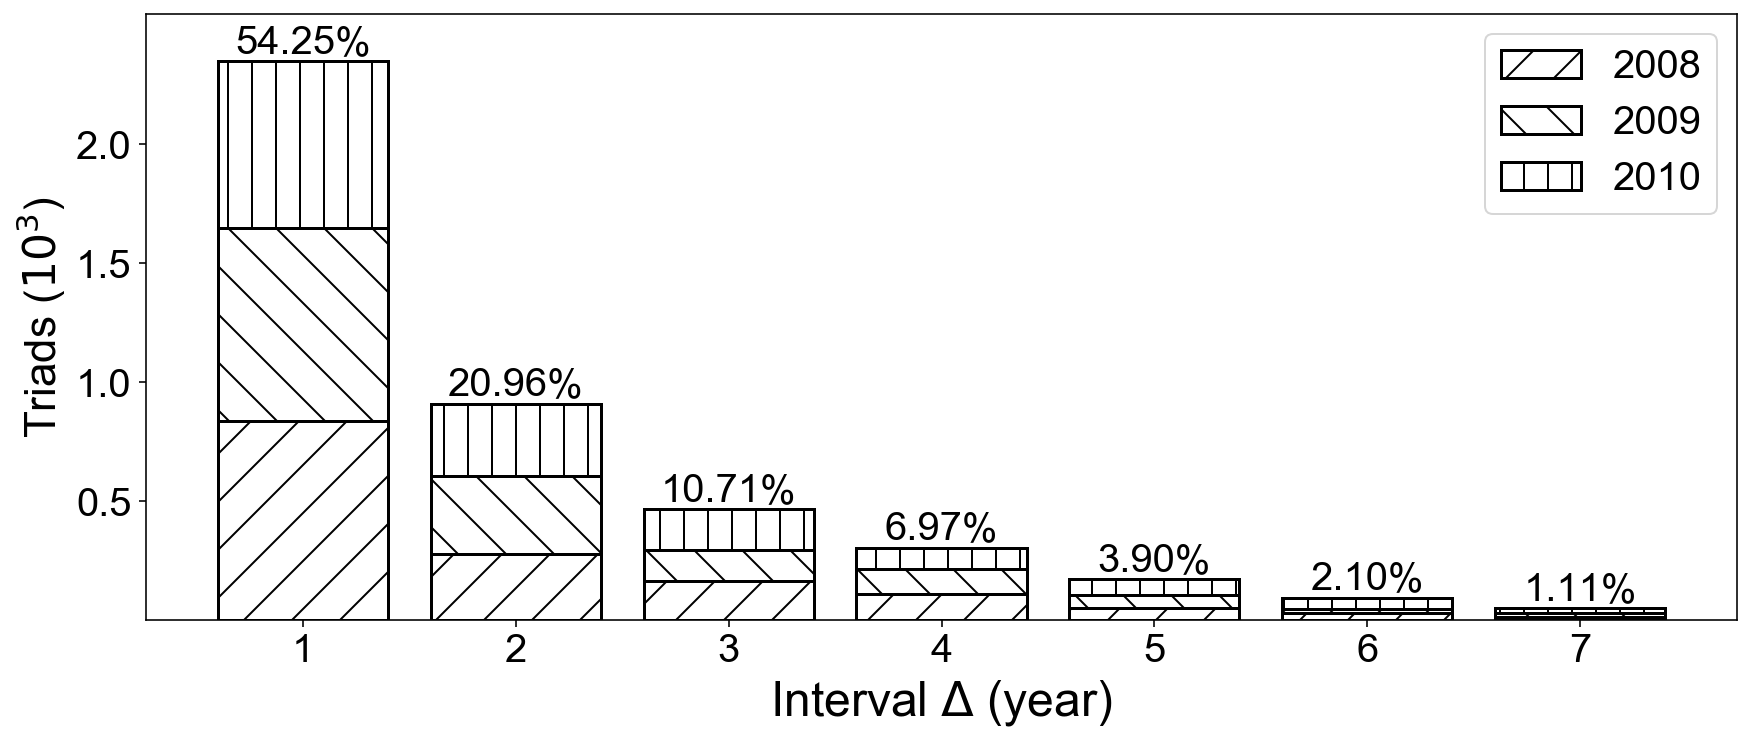

In [6]:
_hp = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(1, 8)
y_2010 = np.array([pair[1] for pair in sorted(nbr_by_diff[2010].items(), key=lambda pair: pair[0])])
y_2009 = np.array([pair[1] for pair in sorted(nbr_by_diff[2009].items(), key=lambda pair: pair[0])])
y_2008 = np.array([pair[1] for pair in sorted(nbr_by_diff[2008].items(), key=lambda pair: pair[0])])

bar1 = ax.bar(x, y_2008, 
              color='w', edgecolor='black', hatch=_hp[0], linewidth=1.5,
              label='2008')
bar2 = ax.bar(x, y_2009, bottom=y_2008, 
              color='w', edgecolor='black', hatch=_hp[1], linewidth=1.5,
              label='2009')
bar3 = ax.bar(x, y_2010, bottom=y_2008 + y_2009, 
              color='w', edgecolor='black', hatch=_hp[2], linewidth=1.5,
              label='2010')

rects1 = bar1.patches
rects2 = bar2.patches
rects3 = bar3.patches

for rect1, rect2, rect3, label in zip(rects1, rects2, rects3, labels):
    height = rect1.get_height() + rect2.get_height() + rect3.get_height()
    ax.text(rect1.get_x() + rect1.get_width() / 2, height + 5, label,
        ha='center', va='bottom', fontsize=20)

# y axis
ax.set_ylim(0, 2550)
ax.yaxis.set_ticks([500, 1000, 1500, 2000])
ax.set_yticklabels([0.5, 1.0, 1.5, 2.0])
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)


ax.set_xlabel(r'Interval $\Delta$ (year)', fontsize=24)
ax.set_ylabel(r'Triads ($10^{3}$)', fontsize=22)
ax.legend(fontsize=20)

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
fig.savefig(os.path.join('.', 'motivation-2.pdf'), bbox_inches='tight', dpi=200)